# Commuting Zones in Lebanon

In [ ]:
knitr::opts_chunk$set(warning = FALSE, message = FALSE)

# Visualizing Spatial Data with R and tmap

This notebook demonstrates how to read and visualize spatial data in R
using the `tidyverse`, `sf`, and `tmap` libraries. We’ll also use
`tmaptools` for additional mapping capabilities. The data includes
geographical areas for commuting zones with various attributes such as
population, road length, and the number of different types of
facilities. The data files are stored in the OneDrive folder.

## Setup: Loading Libraries

In [ ]:
library(tidyverse)
library(sf)
library(tmap)
library(tmaptools)

## Reading Data

Here we read both the shape and data files.

In [ ]:
df <- st_read("OneDrive_1_8-29-2023/commuting_zones/536501471557971_2023-03-05.csv",
              wkt = "GEOMETRY")

Reading layer `536501471557971_2023-03-05' from data source 
  `/Users/juanignaciofulponi/Desktop/lebanon/OneDrive_1_8-29-2023/commuting_zones/536501471557971_2023-03-05.csv' 
  using driver `CSV'

## Filtering Data

In this example, we are focusing on areas within Lebanon.

In [ ]:
shp_filtered <- shp %>% filter(country == "Lebanon")

## Setting up Variables and Palettes

Here we specify the numeric variables we are interested in and also
define a set of color palettes for visualization.

In [ ]:
numeric_vars <- c("win_population", "win_roads_km", "restaurant_bar_count", "library_count", 
                  "grocery_food_count", "education_count", "local_business_locations_count",
                  "parks_count", "health_services_count")

color_palettes <- c("viridis", "plasma", "inferno", "magma", "cividis", "RdYlBu", "RdGy", "RdYlGn", "PiYG", "PRGn")

## Plotting Population Data

The first map will display the population data.

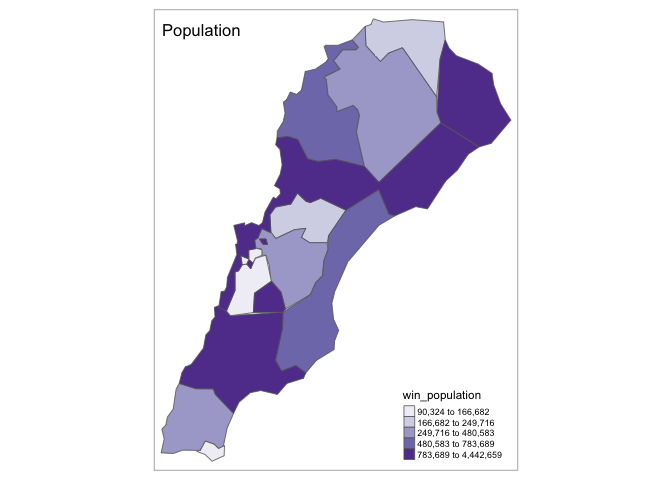

In [ ]:
shp_filtered %>%
  tm_shape() +
  tm_borders() +
  tm_polygons(col = "win_population", 
              title = NA,
              palette = "Purples",
              style = "quantile") +
  tm_layout(title = "Population",
            scale = .8)

## Adjust Data and Generate Maps

We normalize the data by the area and create maps for each variable. The
maps will be printed in a layout of three maps per row.

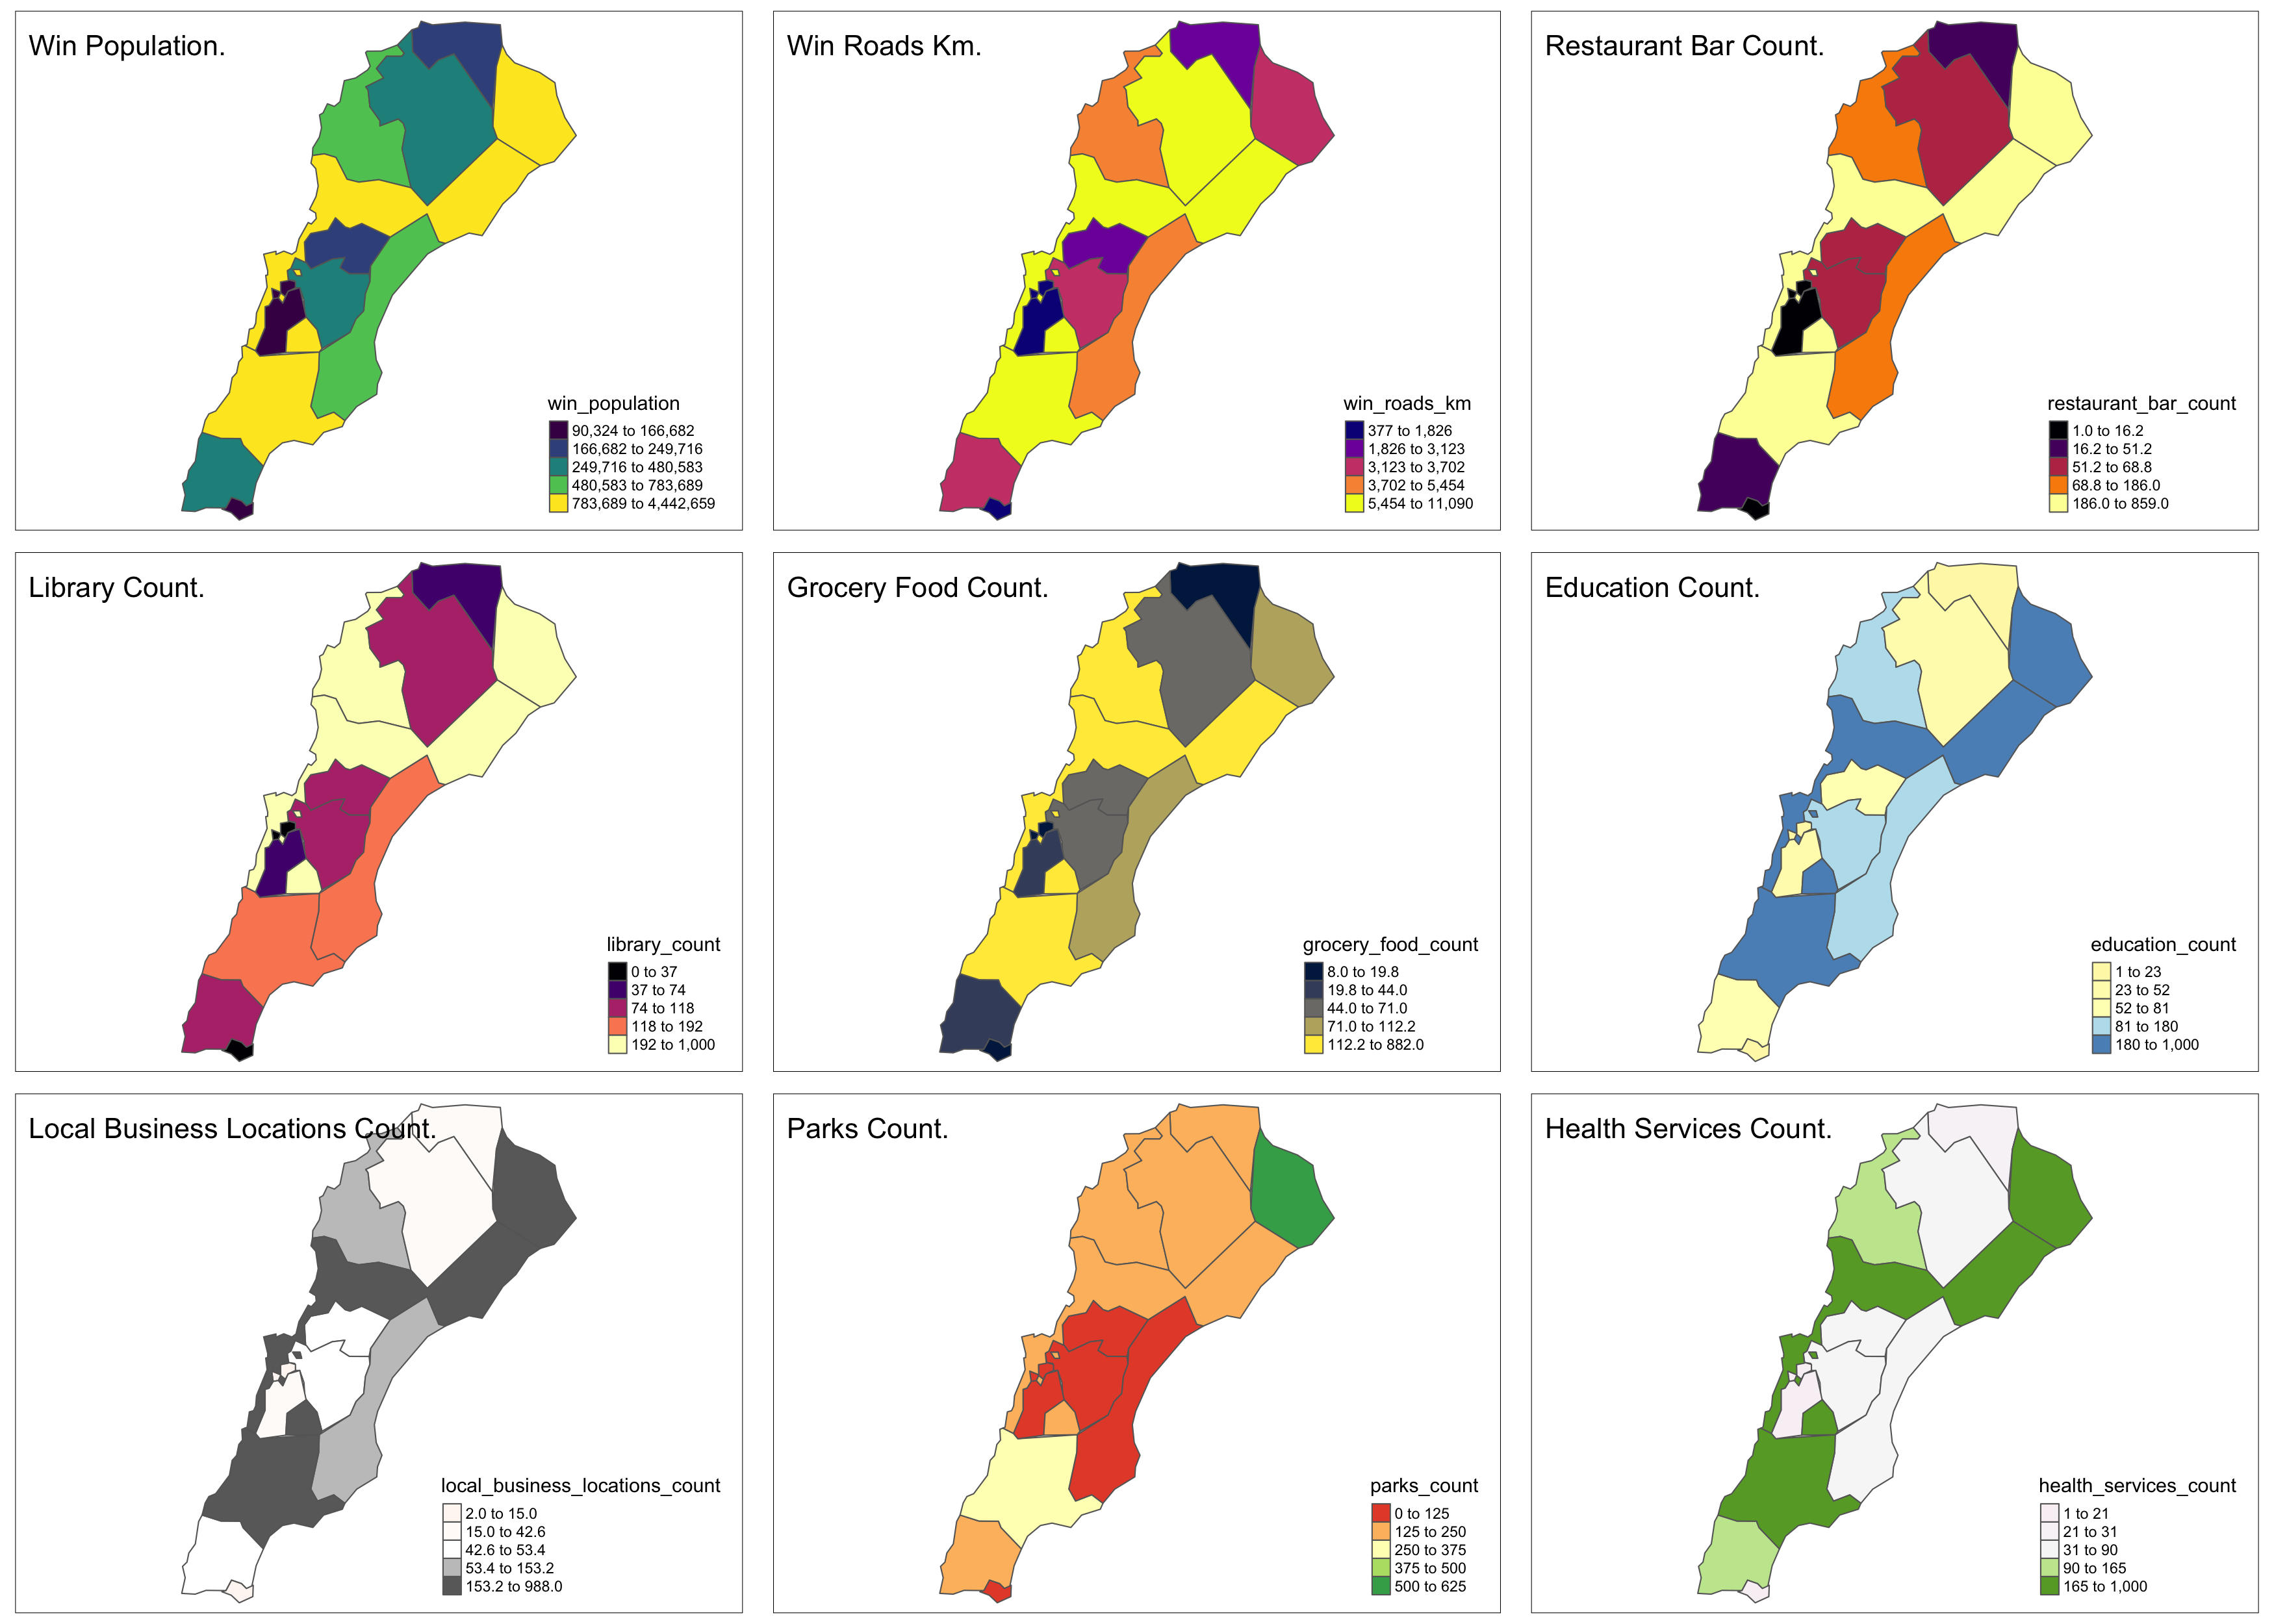

In [ ]:
arranged <- map(numeric_vars, function(x){
  
  legible_name <- gsub("_", " ", x)
  legible_name <- tools::toTitleCase(legible_name)
  
    shp_filtered %>%
    tm_shape() +
    tm_borders() +
    tm_polygons(col = x, 
                title = NA,
                palette = color_palettes[which(numeric_vars == x)],
                style = "quantile") +
    tm_layout(title = paste0(legible_name, "."),
              scale = .4)
  
}
)

tmap_arrange(arranged, ncol = 3)

Now we can easily adjust the data by area to get more powerful insights.

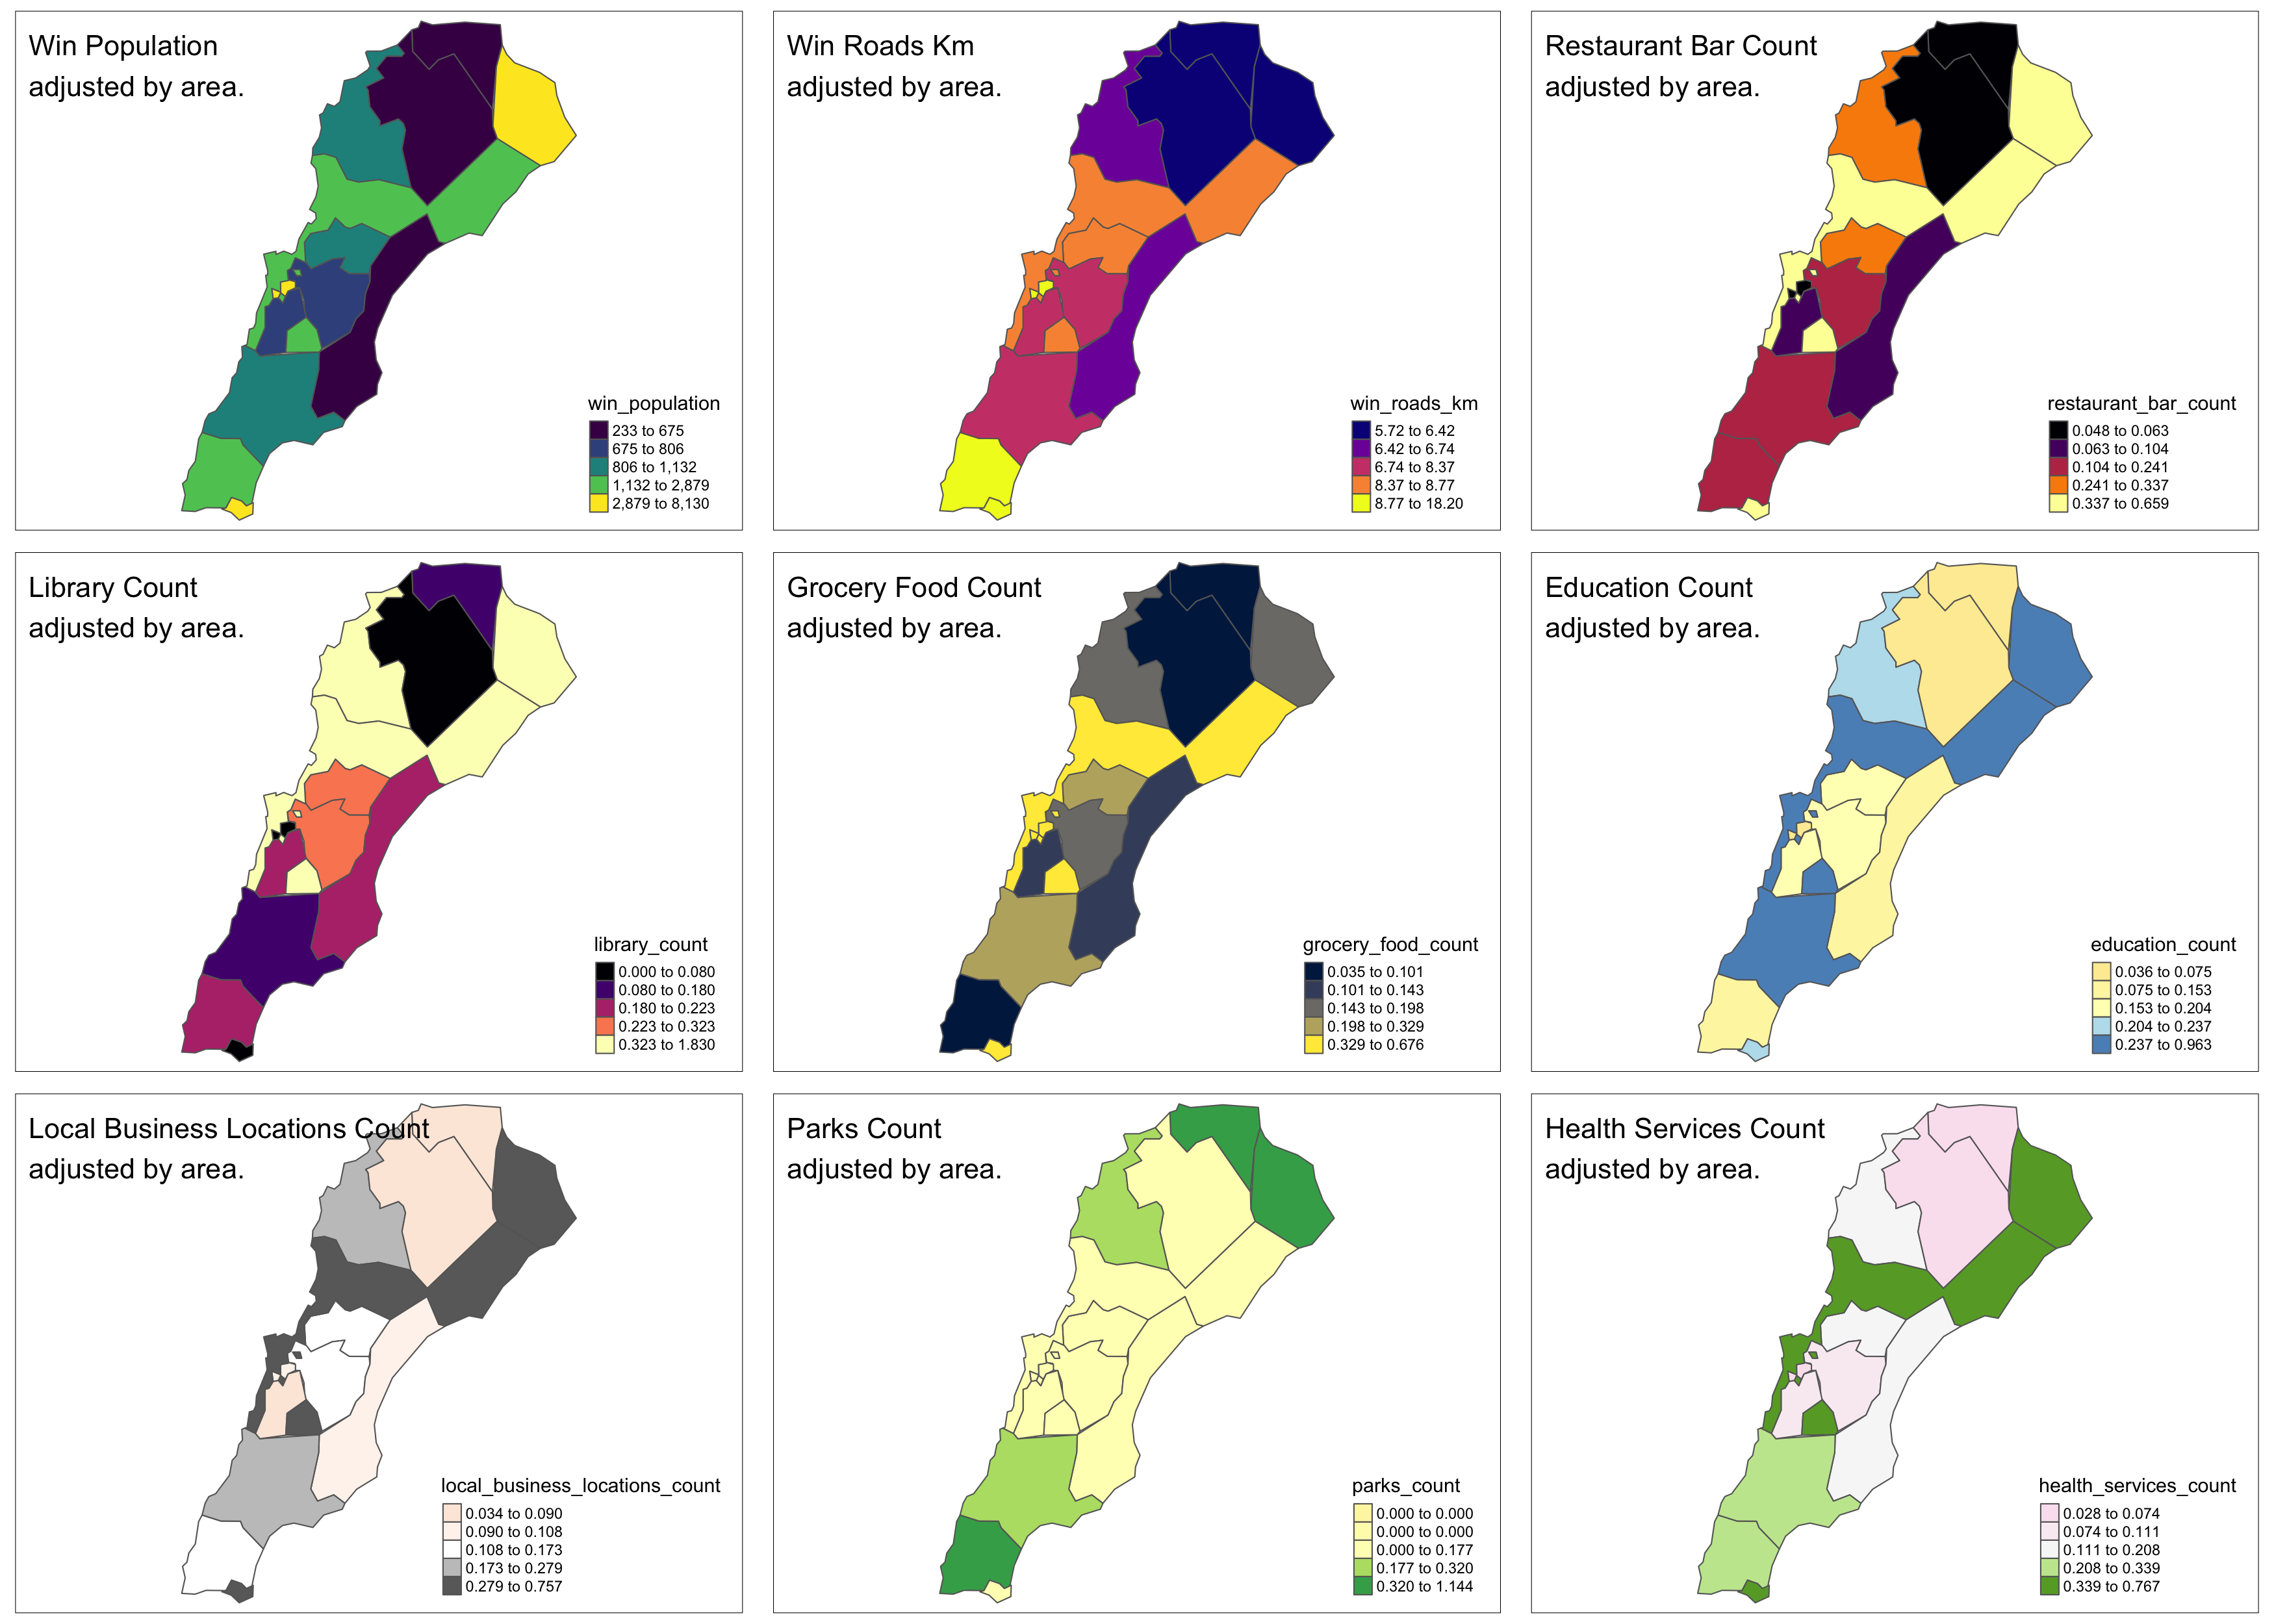

In [ ]:
shp_filtered <- shp_filtered %>%
  mutate(across(all_of(numeric_vars), ~ . / area))

arranged <- map(numeric_vars, function(x){
  
  legible_name <- gsub("_", " ", x)
  legible_name <- tools::toTitleCase(legible_name)
  
    shp_filtered %>%
    tm_shape() +
    tm_borders() +
    tm_polygons(col = x, 
                title = NA,
                palette = color_palettes[which(numeric_vars == x)],
                style = "quantile") +
    tm_layout(title = paste0(legible_name, " \nadjusted by area."),
              scale = .4)
  
}
)

tmap_arrange(arranged, ncol = 3)